In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression # model
from sklearn.model_selection import train_test_split # split data
from sklearn.metrics import mean_absolute_error, mean_squared_error # for evaluate and you want them to reach minimum values
from sklearn.preprocessing import MinMaxScaler # scale data

# Read data

In [2]:
car = pd.read_csv('Auto_data.csv')
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


there are values with ? that's mean these are null values

In [3]:
# reread file with na_value = '?'
car = pd.read_csv('Auto_data.csv', na_values='?')
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
car.columns[car.dtypes=='object']

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [7]:
car.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Dealing with nulls

In [8]:
car.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
car['normalized-losses'].unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

In [10]:
avg = car.mean().round(2)
avg

C:\Users\ibrah\AppData\Local\Temp\ipykernel_15176\1302794193.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = car.mean().round(2)


symboling                0.83
normalized-losses      122.00
wheel-base              98.76
length                 174.05
width                   65.91
height                  53.72
curb-weight           2555.57
engine-size            126.91
bore                     3.33
stroke                   3.26
compression-ratio       10.14
horsepower             104.26
peak-rpm              5125.37
city-mpg                25.22
highway-mpg             30.75
price                13207.13
dtype: float64

In [11]:
# copy the data to another variable
car_df = car.copy()

# fill nul values

In [12]:
car_df = car_df.fillna(avg)

In [13]:
car_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

we find number-of-doors still has missing values because this column not numeric

# Convert numeric words to numbers

In [14]:
# first check unique values in it
car_df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [15]:
# fill null values with mode value
car_df['num-of-doors'] = car_df['num-of-doors'].fillna('four')

In [16]:
# first check unique values again
car_df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

# Categorical Features Transformation

In [17]:
car_df.select_dtypes(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


notice here num-of-doors and num-of-cylinders can easily converted to categories data type

In [18]:
# copy of data
car_df2 = car_df.copy()

In [19]:
# number of doors
car_df2['num-of-doors'] = car_df2['num-of-doors'].replace({'two':2, 'four':4})
car_df2['num-of-doors'].unique()

array([2, 4], dtype=int64)

In [20]:
# number of cylinders
car_df2['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [21]:
# convert to numeric with word2number package
from word2number import w2n
car_df2['num-of-cylinders'] = car_df2['num-of-cylinders'].apply(w2n.word_to_num)
# check unique values again
car_df2['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

# Data Correlation

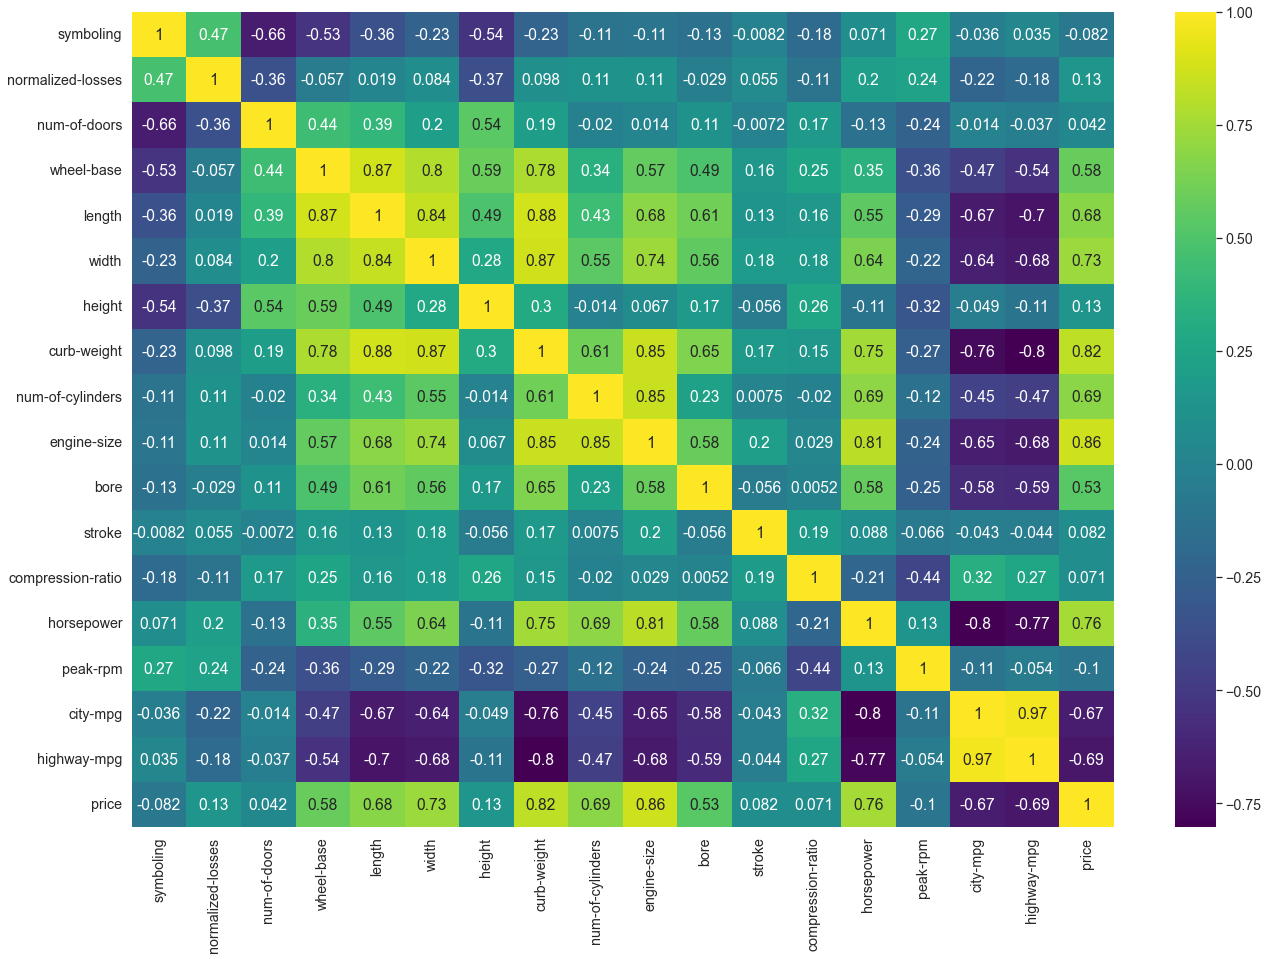

In [22]:
sns.set(rc={'figure.figsize': [22, 15]}, font_scale=1.3)
sns.heatmap(car_df2.corr(), annot=True,  cmap='viridis');

In [23]:
corr_features = car_df2.corr().unstack().sort_values()
corr_features

horsepower         city-mpg            -0.803162
city-mpg           horsepower          -0.803162
highway-mpg        curb-weight         -0.797465
curb-weight        highway-mpg         -0.797465
highway-mpg        horsepower          -0.770903
                                          ...   
bore               bore                 1.000000
curb-weight        curb-weight          1.000000
normalized-losses  normalized-losses    1.000000
peak-rpm           peak-rpm             1.000000
num-of-cylinders   num-of-cylinders     1.000000
Length: 324, dtype: float64

In [24]:
# get high corr with > 0.7 note use abs to convert negative
corr_features[(abs(corr_features) >0.7) & (abs(corr_features) < 1)].drop_duplicates()

horsepower         city-mpg            -0.803162
highway-mpg        curb-weight         -0.797465
                   horsepower          -0.770903
city-mpg           curb-weight         -0.757414
length             highway-mpg         -0.704662
price              width                0.728699
width              engine-size          0.735433
horsepower         curb-weight          0.750968
                   price                0.757917
wheel-base         curb-weight          0.776386
                   width                0.795144
horsepower         engine-size          0.810713
price              curb-weight          0.820825
width              length               0.841118
num-of-cylinders   engine-size          0.846031
curb-weight        engine-size          0.850594
price              engine-size          0.861752
curb-weight        width                0.867032
wheel-base         length               0.874587
length             curb-weight          0.877728
highway-mpg        c

In [25]:
# get columns name that have high correlation
high_corr = pd.DataFrame(corr_features[(abs(corr_features) >0.7) & (abs(corr_features) < 1)].drop_duplicates())
# check index
high_corr.index

MultiIndex([(       'horsepower',          'city-mpg'),
            (      'highway-mpg',       'curb-weight'),
            (      'highway-mpg',        'horsepower'),
            (         'city-mpg',       'curb-weight'),
            (           'length',       'highway-mpg'),
            (            'price',             'width'),
            (            'width',       'engine-size'),
            (       'horsepower',       'curb-weight'),
            (       'horsepower',             'price'),
            (       'wheel-base',       'curb-weight'),
            (       'wheel-base',             'width'),
            (       'horsepower',       'engine-size'),
            (            'price',       'curb-weight'),
            (            'width',            'length'),
            ( 'num-of-cylinders',       'engine-size'),
            (      'curb-weight',       'engine-size'),
            (            'price',       'engine-size'),
            (      'curb-weight',             'w

# visualize with scatter to check correlation

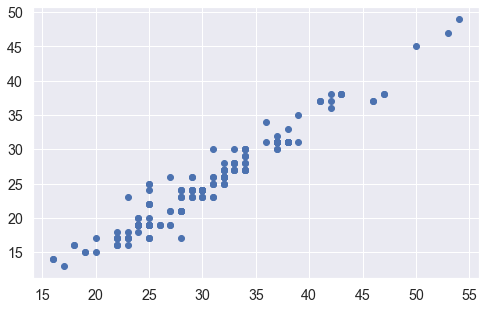

In [26]:
sns.set(rc={'figure.figsize': [8, 5]}, font_scale=1.3)
plt.scatter(car_df2['highway-mpg'], car_df2['city-mpg']);

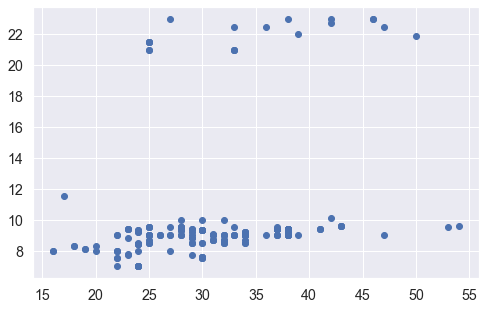

In [27]:
plt.scatter(car_df2['highway-mpg'], car_df2['compression-ratio']);

we notice that in first plot the correlation is high and in second the correlation is low

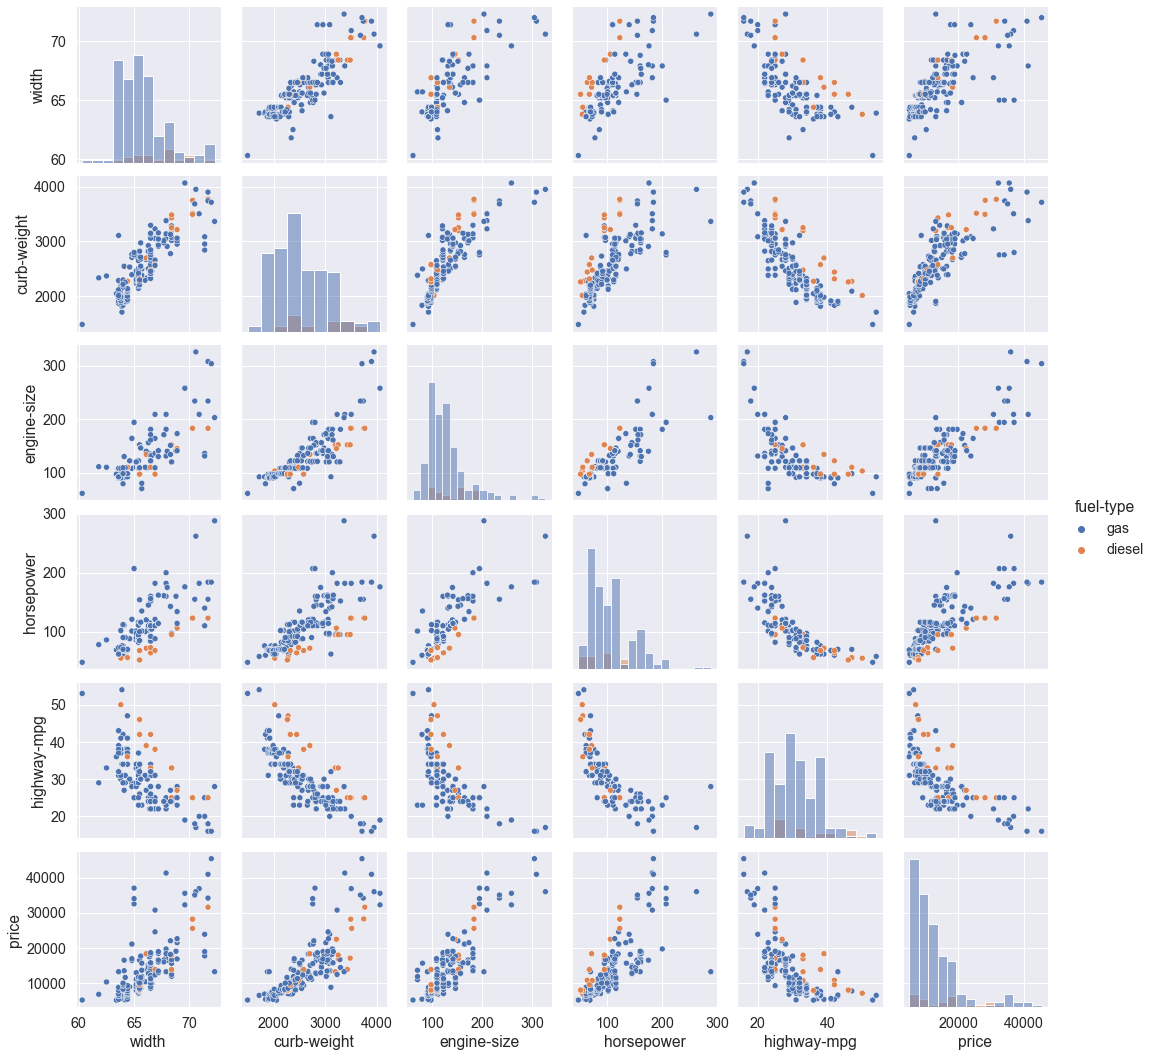

In [28]:
sns.pairplot(car_df2[['width', 'curb-weight', 'engine-size', 'horsepower', 'highway-mpg', 'fuel-type', 'price']],
            diag_kind='hist', hue='fuel-type')
plt.show()

# Feature Reduction

In [29]:
# reset index
high_corr.reset_index(inplace=True)
high_corr.head()

,level_0,level_1,0
0,horsepower,city-mpg,-0.803162
1,highway-mpg,curb-weight,-0.797465
2,highway-mpg,horsepower,-0.770903
3,city-mpg,curb-weight,-0.757414
4,length,highway-mpg,-0.704662


In [30]:
# get the columns name and put it as list but don't forget columns with object type
high_corr_col = list(high_corr['level_0'].unique()) + list(car_df2.columns[car_df2.dtypes=='object'])
high_corr_col

['horsepower',
 'highway-mpg',
 'city-mpg',
 'length',
 'price',
 'width',
 'wheel-base',
 'num-of-cylinders',
 'curb-weight',
 'num-of-doors',
 'engine-size',
 'stroke',
 'height',
 'compression-ratio',
 'make',
 'fuel-type',
 'aspiration',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'fuel-system']

In [31]:
# take specific columns from data
car_redc = car_df2[high_corr_col]
car_redc.head()

,horsepower,highway-mpg,city-mpg,length,price,width,wheel-base,num-of-cylinders,curb-weight,num-of-doors,...,height,compression-ratio,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,111.0,27,21,168.8,13495.0,64.1,88.6,4,2548,2,...,48.8,9.0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,111.0,27,21,168.8,16500.0,64.1,88.6,4,2548,2,...,48.8,9.0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,154.0,26,19,171.2,16500.0,65.5,94.5,6,2823,2,...,52.4,9.0,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,102.0,30,24,176.6,13950.0,66.2,99.8,4,2337,4,...,54.3,10.0,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,115.0,22,18,176.6,17450.0,66.4,99.4,5,2824,4,...,54.3,8.0,audi,gas,std,sedan,4wd,front,ohc,mpfi


In [32]:
car_redc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   horsepower         205 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   length             205 non-null    float64
 4   price              205 non-null    float64
 5   width              205 non-null    float64
 6   wheel-base         205 non-null    float64
 7   num-of-cylinders   205 non-null    int64  
 8   curb-weight        205 non-null    int64  
 9   num-of-doors       205 non-null    int64  
 10  engine-size        205 non-null    int64  
 11  stroke             205 non-null    float64
 12  height             205 non-null    float64
 13  compression-ratio  205 non-null    float64
 14  make               205 non-null    object 
 15  fuel-type          205 non-null    object 
 16  aspiration         205 non

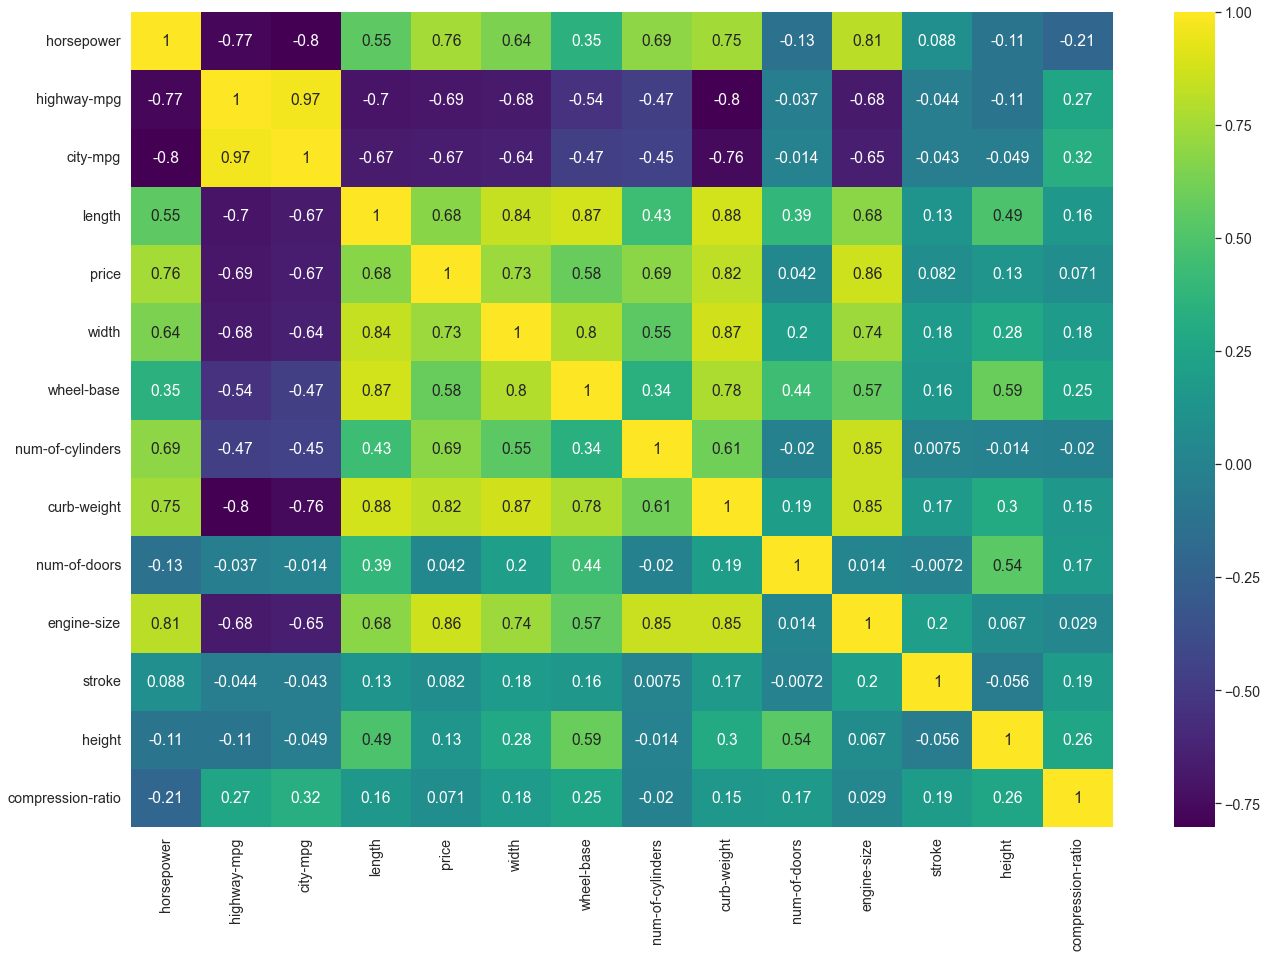

In [33]:
# look to heatmap again
sns.set(rc={'figure.figsize': [22, 15]}, font_scale=1.3)
sns.heatmap(car_redc.corr(), annot=True,  cmap='viridis');

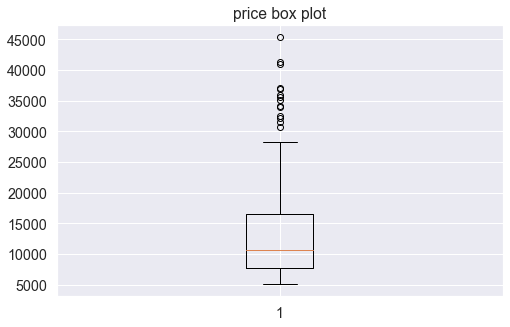

In [34]:
# box plot to price
plt.figure(figsize=(8, 5))
plt.boxplot(car_redc['price'])
plt.title('price box plot')
plt.show();

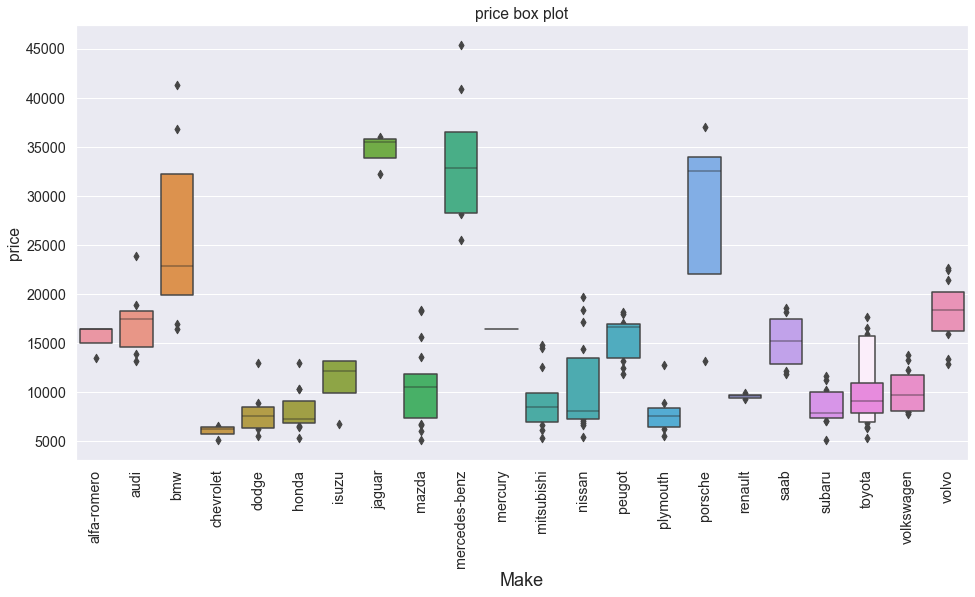

In [35]:
# box plot make with price
plt.figure(figsize=(16, 8))
sns.boxenplot(x=car_redc['make'], y=car_redc['price'])
plt.title('price box plot')
plt.xlabel('Make', size=18)
plt.xticks(rotation=90)
plt.show();

there are outliers

# Categorical Features Transformation Cont.

In [36]:
# copy to categories types
car_cat = car_redc.select_dtypes(include='object')
car_cat.head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


In [37]:
pd.get_dummies(car_cat).columns

Index(['make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'aspiration_std',
       'aspiration_turbo', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-location_rear', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
    

### apply get dummies to data

In [38]:
car_clear = pd.get_dummies(car_redc, drop_first=True)
car_clear.head()

,horsepower,highway-mpg,city-mpg,length,price,width,wheel-base,num-of-cylinders,curb-weight,num-of-doors,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,111.0,27,21,168.8,13495.0,64.1,88.6,4,2548,2,...,0,0,0,0,0,0,0,1,0,0
1,111.0,27,21,168.8,16500.0,64.1,88.6,4,2548,2,...,0,0,0,0,0,0,0,1,0,0
2,154.0,26,19,171.2,16500.0,65.5,94.5,6,2823,2,...,0,1,0,0,0,0,0,1,0,0
3,102.0,30,24,176.6,13950.0,66.2,99.8,4,2337,4,...,0,0,0,0,0,0,0,1,0,0
4,115.0,22,18,176.6,17450.0,66.4,99.4,5,2824,4,...,0,0,0,0,0,0,0,1,0,0


# Split data into Train & Test

In [39]:
x = car_clear.drop('price', axis=1)
y = pd.DataFrame(car_clear['price'])

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [41]:
display(len(xtrain) == len(ytrain))
len(xtest) == len(ytest)

True

True

# Feature Scaling

In [42]:
fit_xtrian = MinMaxScaler().fit(xtrain)
fit_ytrain = MinMaxScaler().fit(ytrain)

In [43]:
scale_xtrain = fit_xtrian.transform(xtrain)
scale_xtest = fit_xtrian.transform(xtest)

In [44]:
scale_ytrain = fit_ytrain.transform(ytrain)
scale_ytest = fit_ytrain.transform(ytest)

# Apply Linear Regression

In [45]:
model = LinearRegression()
model.fit(scale_xtrain, scale_ytrain)
predict = model.predict(scale_xtest)

# Evaluate Model

In [46]:
# two ways
mae = mean_absolute_error(scale_ytest, predict)
print('mean absolute error :', mae.round(4))
rmse = np.sqrt(mean_squared_error(scale_ytest, predict))
print('mean squared error ', rmse.round(4))

mean absolute error : 0.0666
mean squared error  0.1166


### return ytest and predict to actual values

In [47]:
act_ytest = fit_ytrain.inverse_transform(scale_ytest.reshape(-1, 1))
act_pred = fit_ytrain.inverse_transform(predict.reshape(-1, 1))

actual_mae = mean_absolute_error(act_ytest, act_pred)
actual_rmse = np.sqrt(mean_squared_error(act_ytest, act_pred))

print("Actual MAE= ",actual_mae.round(4))
print('Actual RMSE= ',actual_rmse.round(4))

Actual MAE=  2380.3916
Actual RMSE=  4168.5921
